# Visualising taxa abundance

In [1]:
setwd("/home/projects/14001280/PROJECTS/blood_microbiome/")
require(tidyverse)
require(ggplot2)
require(data.table)
require(ggsci)

Loading required package: tidyverse

Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Asia/Singapore’ (or equivalent)”
── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘pack

In [2]:
meta <- fread("data/SG10K_Health_metadata.n10714.16March2021.parsed.csv")
head(meta)

npm_research_id,multiplex_pool_id,supplier_id,gis_internal_sample_id,site_supplying_sample,year_of_birth,supplied_gender,self_reported_ethnicity,extraction_kit,date_of_dna_extraction,⋯,supplied_and_computed_ethinicity_match,sop_agreement_for_coverage__14/_28_for_15x/30x,sample_life_cycle,current,source_cohort,original_supplier_id,duplicate_info,duplicate,duplicate_pair,removal_requested_by_supplier
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
WHB10000,MUX9693,00358,HELIOS_00358_1,HELIOS,1982,F,Chinese,abGENIX Whole Blood Genomic DNA Extraction Kit,6/6/2019,⋯,NA,Y,HELIOS VCF,Y,HELIOS,00358,,PASS,,NA
WHB10001,MUX9693,00359,HELIOS_00359_1,HELIOS,1979,F,Chinese,abGENIX Whole Blood Genomic DNA Extraction Kit,6/6/2019,⋯,NA,Y,HELIOS VCF,Y,HELIOS,00359,,PASS,,NA
WHB10002,MUX9695,00360,HELIOS_00360_1,HELIOS,1970,F,Chinese,abGENIX Whole Blood Genomic DNA Extraction Kit,6/6/2019,⋯,NA,N,HELIOS VCF,Y,HELIOS,00360,,PASS,,NA
WHB10003,MUX9694,00361,HELIOS_00361_1,HELIOS,1969,M,Chinese,abGENIX Whole Blood Genomic DNA Extraction Kit,6/6/2019,⋯,NA,Y,HELIOS VCF,Y,HELIOS,00361,,PASS,,NA
WHB10005,MUX9694,00363,HELIOS_00363_1,HELIOS,1959,F,Chinese,abGENIX Whole Blood Genomic DNA Extraction Kit,6/6/2019,⋯,NA,N,HELIOS VCF,Y,HELIOS,00363,,PASS,,NA
WHB10006,MUX9694,00364,HELIOS_00364_1,HELIOS,1955,F,Chinese,abGENIX Whole Blood Genomic DNA Extraction Kit,6/6/2019,⋯,NA,Y,HELIOS VCF,Y,HELIOS,00364,,PASS,,NA


## Pre-process data

In [3]:
rank <- "S"
n_subset <- 10
str_glue("data/temp_files_{n_subset}/07_abundance_matrix/subset_{n_subset}.{rank}.tsv")

data/temp_files_10/07_abundance_matrix/subset_10.S.tsv

In [4]:
load_data <- function(file_path) {
    df <- fread(file_path) %>%
        column_to_rownames("sample")
    return(df)
}

rank <- "S"
n_subset <- 10

species_df <- load_data(str_glue("data/temp_files_{n_subset}/07_abundance_matrix/abundance_matrix.subset_{n_subset}.{rank}.tsv"))
head(species_df)

,Homo sapiens,Ralstonia pickettii,Ralstonia insidiosa,Ralstonia solanacearum,Pseudomonas mesoacidophila,Burkholderia sp. OLGA172,Burkholderia sp. PAMC 28687,Paraburkholderia caledonica,Paraburkholderia fungorum,Acidovorax sp. JS42,⋯,Brevibacillus formosus,Synechococcus sp. CC9605,Synechococcus sp. JA-2-3B'a(2-13),Flavobacterium psychrophilum,Flavobacterium gilvum,Tenacibaculum dicentrarchi,Mucilaginibacter paludis,Chloroherpeton thalassium,Salinigranum rubrum,Gordonia virus Yeezy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SSMP_060_to_069_SSM063,11,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
MUX3275_WHH450,1284,23,4,1,1,1,1,2,2,2,⋯,0,0,0,0,0,0,0,0,0,0
MUX8435_WHB5403,1296,5,1,8,2,0,1,0,5,13,⋯,0,0,0,0,0,0,0,0,0,0
MUX3971_WHH1356,692,655,419,272,3,4,2,1,23,0,⋯,0,0,0,0,0,0,0,0,0,0
MUX8764_WHB5757,379,4,4,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
MUX10019_WHB6469,397,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


### Count and remove samples with no classified reads
This may include samples that originally had no reads, and samples whose reads cannot be classified

In [5]:
count_zero_reads <- function(df) {
    df %>%
        rowwise() %>%
        mutate(total = sum(across(everything()))) %>%
        filter(total == 0) %>%
        nrow()
    }

count_zero_reads(species_df)

[1] 0

### Normalise to relative abundance

In [6]:
normalise <- function(df) {
    RA_df <- t(apply(df, 1, function(x) {x / sum(x) * 100}))
    return(RA_df)
}

species_RA <- normalise(species_df)
species_RA

,Homo sapiens,Ralstonia pickettii,Ralstonia insidiosa,Ralstonia solanacearum,Pseudomonas mesoacidophila,Burkholderia sp. OLGA172,Burkholderia sp. PAMC 28687,Paraburkholderia caledonica,Paraburkholderia fungorum,Acidovorax sp. JS42,⋯,Brevibacillus formosus,Synechococcus sp. CC9605,Synechococcus sp. JA-2-3B'a(2-13),Flavobacterium psychrophilum,Flavobacterium gilvum,Tenacibaculum dicentrarchi,Mucilaginibacter paludis,Chloroherpeton thalassium,Salinigranum rubrum,Gordonia virus Yeezy
SSMP_060_to_069_SSM063,100.0000000,0.000000000,0.000000e+00,0.000000000,0.000000000,0.000000000,0.0000000000,0.00000000,0.000000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
MUX3275_WHH450,93.5860058,1.676384840,2.915452e-01,0.072886297,0.072886297,0.072886297,0.0728862974,0.14577259,0.145772595,0.145772595,⋯,0,0,0,0,0,0,0,0,0,0
MUX8435_WHB5403,0.9499307,0.003664856,7.329712e-04,0.005863770,0.001465942,0.000000000,0.0007329712,0.00000000,0.003664856,0.009528626,⋯,0,0,0,0,0,0,0,0,0,0
MUX3971_WHH1356,25.7824143,24.403874814,1.561103e+01,10.134128167,0.111773472,0.149031297,0.0745156483,0.03725782,0.856929955,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
MUX8764_WHB5757,6.4161165,0.067716269,6.771627e-02,0.000000000,0.000000000,0.000000000,0.0000000000,0.00000000,0.000000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
MUX10019_WHB6469,25.5798969,0.000000000,0.000000e+00,0.000000000,0.000000000,0.064432990,0.0000000000,0.00000000,0.000000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
MUX9843_WHB10092,27.8720123,0.000000000,0.000000e+00,0.038550501,0.000000000,0.000000000,0.0000000000,0.00000000,0.000000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
MUX3381_WHH779,90.2892562,1.446280992,3.099174e-01,0.000000000,0.000000000,0.000000000,0.0000000000,0.00000000,0.000000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
MUX5305_WHH4949,95.7281553,0.000000000,0.000000e+00,0.000000000,0.000000000,0.000000000,0.0000000000,0.00000000,0.000000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
SSMP_010_to_019_SSM016,100.0000000,0.000000000,0.000000e+00,0.000000000,0.000000000,0.000000000,0.0000000000,0.00000000,0.000000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0


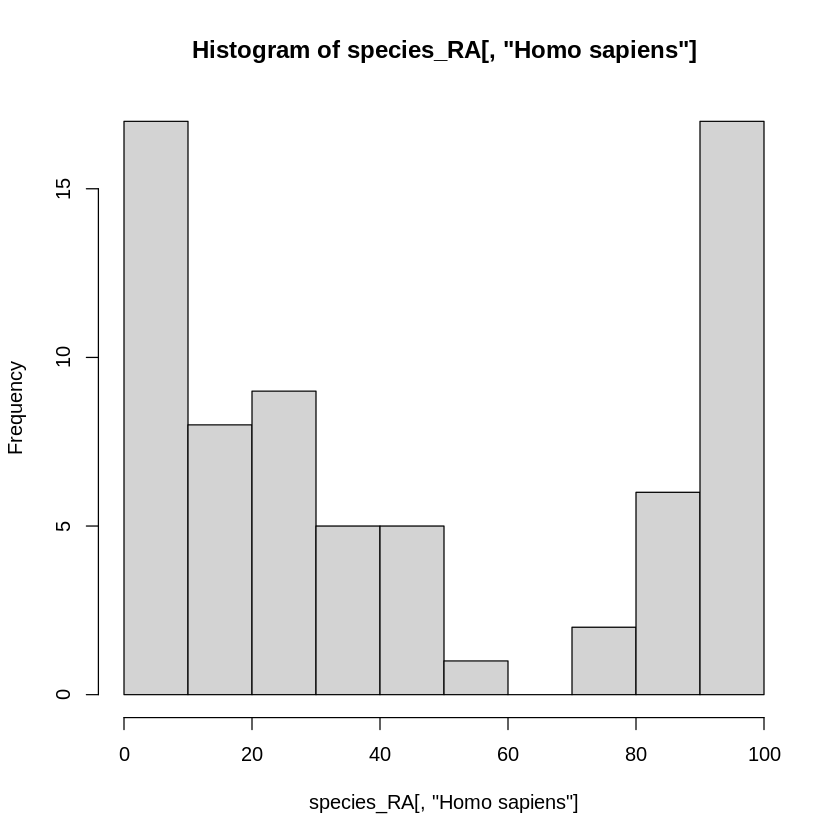

In [7]:
hist(species_RA[, 'Homo sapiens'])

## Relative abundance for all samples

### Matrix --> long format

In [8]:
to_long_format <- function(RA_df) {
    plot_df <- as_tibble(RA_df, rownames = "sample") %>%
        pivot_longer(!sample, names_to = "rank", values_to = "abundance")
    return(plot_df)
    }

plot_species_RA <- to_long_format(species_RA)

### Keep only top N ranks
ranked by median relative abundance

In [9]:
get_top_N_ranks <- function(plot_df, n_keep) {
    ranks_to_keep <- plot_df %>% 
        group_by(rank) %>%
        summarise(median = median(abundance)) %>%
        arrange(desc(median))
      ranks_to_keep <- ranks_to_keep$rank[1:n_keep]
    return(ranks_to_keep)
}

n_keep <- 8
species_to_keep <- get_top_N_ranks(plot_species_RA, n_keep)

### Visualise relative abundances

Define palette

In [10]:
pal <- c("#d1495b", "#00798c", "#edae49", 
         "#66a182", "#2e4057", "#8d96a3",
         "#8E44AD", "#2980b9")

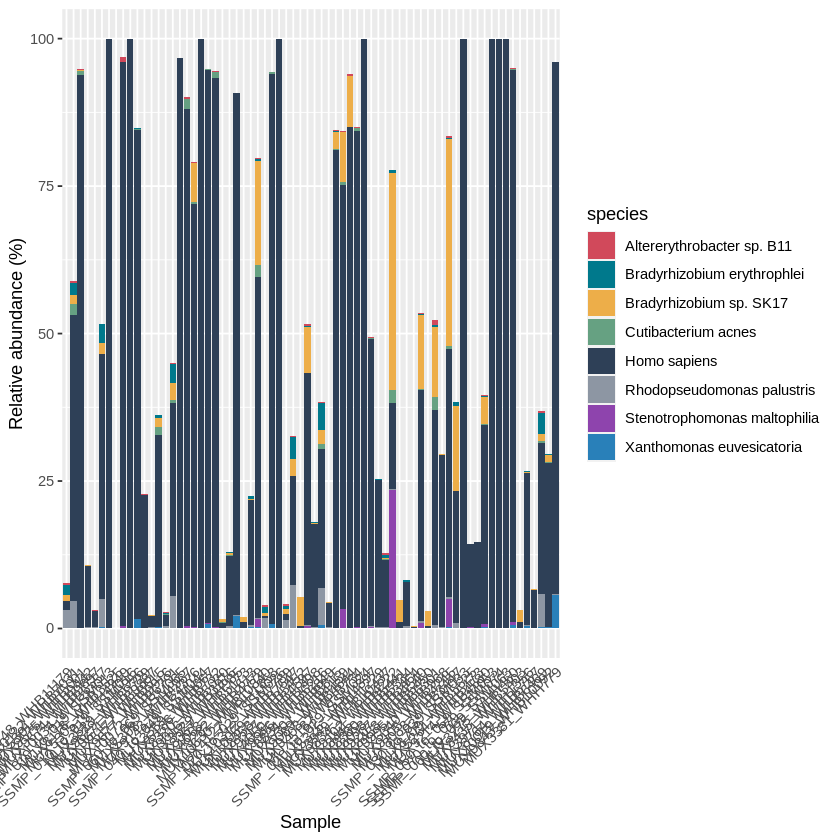

In [11]:
get_plot <- function(plot_df, ranks_to_keep, rank_name) {
    plt <- plot_df %>%
        filter(rank %in% ranks_to_keep) %>%
        mutate(sample = factor(sample, levels = unique(sample)[order(sample)])) %>%
        ggplot(aes(x = sample, y = abundance, fill = rank)) +
            geom_bar(stat = "identity", position = "stack") +
            labs(x = "Sample", y = "Relative abundance (%)", fill = rank_name) +
            theme(axis.text.x = element_text(angle = 45, hjust = 1),
                  axis.ticks.x = element_blank()) +
            scale_fill_manual(values = pal[1:n_keep])
    return(plt)
}

# get_plot(plot_family_RA, family_to_keep, "family")
# get_plot(plot_genus_RA, genus_to_keep, "genus")
get_plot(plot_species_RA, species_to_keep, "species")

Rather heterogenous

## Relative abundance by cohort

### Add metadata, groupby cohort and --> long format

In [12]:
parse_cohort_data <- function(RA_df) {
    plot2_df <- as_tibble(RA_df, rownames = "sample") %>%
        separate(sample, into = c(NA, "npm_research_id"), sep = "_") %>%
        left_join(meta, by = "npm_research_id")
    
    plot2_df <- plot2_df %>%
    group_by(source_cohort) %>%
    summarise(across(where(is.numeric), ~ mean(.x, na.rm = T))) %>%
    pivot_longer(!source_cohort, names_to = "rank", values_to = "abundance")
}

# cohort_family_RA <- parse_cohort_data(family_RA)
# cohort_genus_RA <- parse_cohort_data(genus_RA)
cohort_species_RA <- parse_cohort_data(species_RA)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 10 rows [1, 10, 21, 31, 47, 51, 55, 56, 57, 60].”


### Visualise

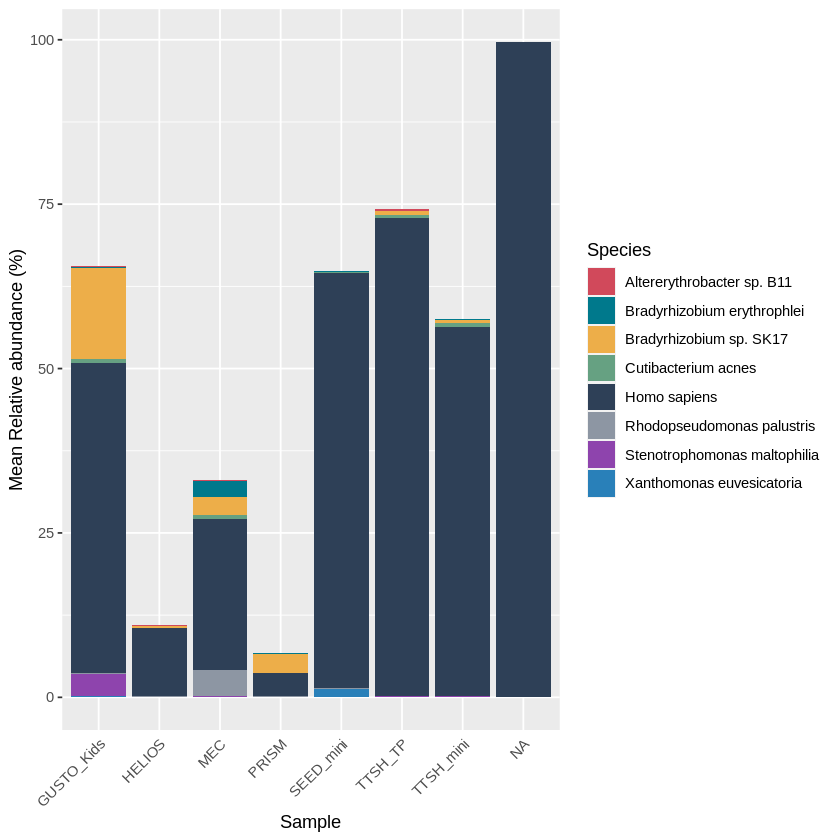

In [13]:
get_cohort_plt <- function(plot2_df, ranks_to_keep, rank_name) {
    plt <- plot2_df %>%
        filter(rank %in% ranks_to_keep) %>%
    #     mutate(sample = factor(sample, levels = unique(sample)[order(sample)])) %>%
        ggplot(aes(x = source_cohort, y = abundance, fill = rank)) +
            geom_bar(stat = "identity", position = "stack") +
            labs(x = "Sample", y = "Mean Relative abundance (%)", fill = rank_name) +
            theme(axis.text.x = element_text(angle = 45, hjust = 1),
                  axis.ticks.x = element_blank()) +
            scale_fill_manual(values = pal[1:n_keep])
    return(plt)
}

# get_cohort_plt(cohort_family_RA, family_to_keep, "Family")
# get_cohort_plt(cohort_genus_RA, genus_to_keep, "Genus")
get_cohort_plt(cohort_species_RA, species_to_keep, "Species")